In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
IMG_SHAPE = 128
IMG_FOLDER = "./Flowers-Dataset/flowers/"
BATCH_SIZE = 64

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, 
                                                          rotation_range=45, horizontal_flip=True, vertical_flip=True,
                                                          validation_split=0.2)

In [18]:
train = datagen.flow_from_directory(IMG_FOLDER, target_size=(IMG_SHAPE,IMG_SHAPE), color_mode='rgb',
                                    class_mode='categorical', batch_size=BATCH_SIZE,
                                    shuffle=True, subset='training')
test = datagen.flow_from_directory(IMG_FOLDER, target_size=(IMG_SHAPE,IMG_SHAPE), color_mode='rgb',
                                class_mode='categorical', batch_size=BATCH_SIZE,
                                shuffle=False, subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Input((IMG_SHAPE,IMG_SHAPE,3)))
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [22]:
hist = model.fit(train, epochs=25)

Epoch 1/25
55/55 [==============================] - 104s 2s/step - loss: 1.5893 - accuracy: 0.2551
Epoch 2/25
55/55 [==============================] - 119s 2s/step - loss: 1.4106 - accuracy: 0.3818
Epoch 3/25
55/55 [==============================] - 105s 2s/step - loss: 1.2392 - accuracy: 0.4391
Epoch 4/25
55/55 [==============================] - 109s 2s/step - loss: 1.1788 - accuracy: 0.4892
Epoch 5/25
55/55 [==============================] - 102s 2s/step - loss: 1.1908 - accuracy: 0.5010
Epoch 6/25
55/55 [==============================] - 88s 2s/step - loss: 1.1249 - accuracy: 0.5201
Epoch 7/25
55/55 [==============================] - 82s 1s/step - loss: 1.1062 - accuracy: 0.5380
Epoch 8/25
55/55 [==============================] - 92s 2s/step - loss: 1.1027 - accuracy: 0.5418
Epoch 9/25
55/55 [==============================] - 81s 1s/step - loss: 1.0715 - accuracy: 0.5664
Epoch 10/25
55/55 [==============================] - 78s 1s/step - loss: 1.0684 - accuracy: 0.5673
Epoch 11/25
55

In [23]:
model.save("flowers.h5")

In [24]:
loss, acc = model.evaluate(test)

14/14 [==============================] - 14s 1s/step - loss: 0.9333 - accuracy: 0.6291


In [25]:
print(f"Loss Value for Test Data : {loss:0.2f}")
print(f"Accuracy for Test Data : {acc:0.2f}")

Loss Value for Test Data : 0.93
Accuracy for Test Data : 0.63


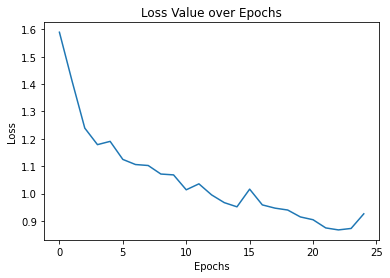

In [26]:
plt.plot(hist.history['loss'])
plt.title("Loss Value over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

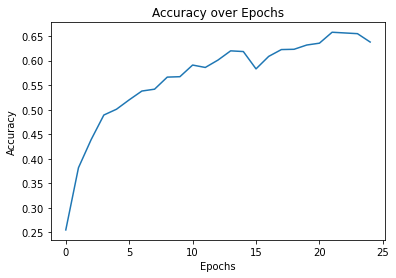

In [27]:
plt.plot(hist.history['accuracy'])
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()